In [1]:
import os
import scipy.io as sio
import scipy.misc as smisc
import numpy as np
import re as regexp
import math
import matplotlib.pyplot as plt
import scipy
from PIL import Image
import struct
import cv2

In [2]:
# Center position of each image from base to base+7 measured by hand
center_list = np.array([[465,485],[396,612],[368,606],[429,538],[524,506],[533,500],[510,478],[429,409]])

(-0.5, 735.5, 735.5, -0.5)

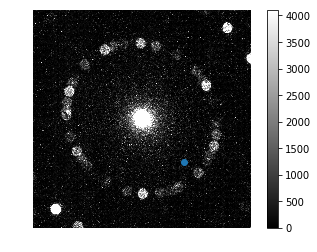

In [36]:
plt.imshow(temp_cropped, cmap='gray')
plt.colorbar()
plt.scatter(512,512)
plt.axis('off')

/srv/home/chenyu/DEbackup/110719/A-18-3-1/Edge2/Base+0.mrc


/srv/home/chenyu/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  # This is added back by InteractiveShellApp.init_path()


/srv/home/chenyu/DEbackup/110719/A-18-3-1/Edge2/Base+1.mrc
/srv/home/chenyu/DEbackup/110719/A-18-3-1/Edge2/Base+2.mrc
/srv/home/chenyu/DEbackup/110719/A-18-3-1/Edge2/Base+3.mrc
/srv/home/chenyu/DEbackup/110719/A-18-3-1/Edge2/Base+4.mrc
/srv/home/chenyu/DEbackup/110719/A-18-3-1/Edge2/Base+5.mrc
/srv/home/chenyu/DEbackup/110719/A-18-3-1/Edge2/Base+6.mrc
/srv/home/chenyu/DEbackup/110719/A-18-3-1/Edge2/Base+7.mrc


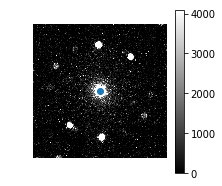

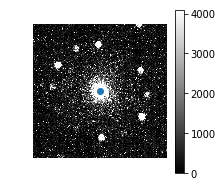

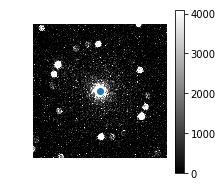

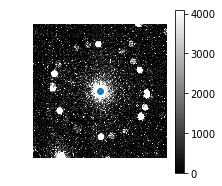

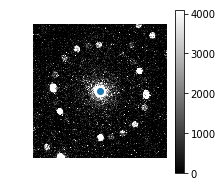

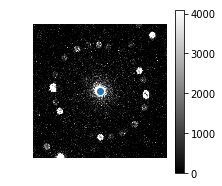

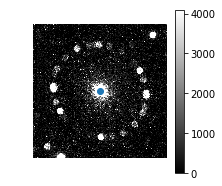

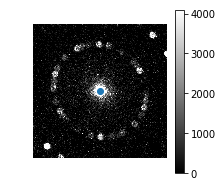

In [6]:
# find the size to crop
crop_size = np.min((center_list, 1024-center_list))
for i in range(center_list.shape[0]):
    file = '/srv/home/chenyu/DEbackup/110719/A-18-3-1/Edge2/Base+' + str(i) + '.mrc'
    print(file)
    temp = loadMRCfile(file)
    translation_matrix = np.float32([[1,0,512-center_list[i,0]],[0,1,center_list[i,1] - 512]])
    temp_registered = cv2.warpAffine(temp, translation_matrix, (1024,1024))
    temp_registered[temp_registered < 200] = 0
    temp_cropped = temp_registered[512-crop_size:512+crop_size,512-crop_size:512+crop_size]
    smisc.imsave('/srv/home/chenyu/DEbackup/110719/A-18-3-1/Edge2/Base+'+str(i)+'registered.tiff',temp_cropped)
    fig = plt.figure(figsize=(3,3))
    plt.imshow(temp_cropped, cmap='gray')
    plt.colorbar()
    plt.scatter(crop_size, crop_size)
    plt.axis('off')
    
    

In [4]:
def RegisterImage(img, center):
    dataset_registered[irow,icol,:,:] = cv2.warpAffine(im, translation_matrix, (num_cols, num_rows))

In [5]:
def loadMRCfile(filepath):
    with open(filepath, mode='rb') as file: # b is important -> binary
        file.seek(0)
        read_bytes = file.read(8)
        frame_width = struct.unpack('<i',read_bytes[0:4])
        frame_width = frame_width[0]
        frame_height = struct.unpack('<i',read_bytes[4:8])
        frame_height = frame_height[0]
        image = np.zeros((frame_height,frame_width))
        file.seek(256*4)
        dataset = file.read(frame_width*frame_height*4)
        for irow in range(frame_height):
            for icol in range(frame_width):
                pixel = struct.unpack('<f',dataset[(irow*frame_width+icol)*4:(irow*frame_width+icol+1)*4])[0]
                image[irow,icol] = pixel
        return image